In [48]:
#Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm

# Partie Code 

## 1. Rajouter à la base Trafic, en utilisant les deux autres bases,
 
- le nom de la ville d'origine

- le nom de la ville de destination

- la distance entre les deux villes

In [11]:
df_trafic = pd.read_csv('Entretien_Trafic.csv')
df_trafic.sample(5)

,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF
9161,9161,3134,10007,10009,1817,2117,9,93,29.484,False
7846,7846,5058,10009,10007,1512,1812,7,91,30.618,False
3397,3397,5320,10005,10006,1356,1556,6,78,92.268,False
4484,4484,7671,10005,10009,1934,2304,4,24,172.976,False
1791,1791,8840,10010,10003,1849,2049,5,5,114.475,False


In [5]:
df_distance = pd.read_csv('Entretien_Distance.csv')
df_distance.sample(5)

,Unnamed: 0,Ville 1,Ville 2,KM
30,30,10009,10007,486
23,23,10008,10007,587
1,1,10000,10002,655
20,20,10007,10008,252
14,14,10006,10005,284


In [6]:
df_ref = pd.read_csv('Entretien_Reference.csv')
df_ref.sample(5)

,Unnamed: 0,Ville,Code Gare
7,7,Rennes,10007
3,3,Marseille,10003
2,2,Reims,10002
1,1,Strasbourg,10001
9,9,Paris,10009


In [7]:
df_trafic.shape

(9378, 10)

La base de données est petite, inutile de s'embête à merge les bases, une boucle for fera très bien l'affaire !

In [17]:
df_trafic['ville_origine'] = 0 

for i in tqdm(df_trafic.index.to_list()):
    code = df_trafic['Origine'][i] 
    ville = df_ref[df_ref['Code Gare'] == code]['Ville'].values[0]
    df_trafic['ville_origine'][i] = ville 

  0%|          | 0/9378 [00:00<?, ?it/s]/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2262/2782377771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trafic['ville_origine'][i] = ville
100%|██████████| 9378/9378 [00:01<00:00, 6604.91it/s]


In [18]:
df_trafic.sample(5)

,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF,ville_origine
5096,5096,8747,10002,10000,1918,2048,4,85,21.840,False,Reims
6617,6617,6815,10001,10000,1743,1913,4,74,0.000,True,Strasbourg
4599,4599,7112,10009,10002,1742,1912,5,65,84.700,False,Paris
8906,8906,5003,10008,10007,952,1222,7,90,41.090,False,Brest
3831,3831,5866,10006,10005,819,1019,3,33,57.084,False,La Rochelle


In [19]:
df_trafic['ville_destination'] = 0 

for i in tqdm(df_trafic.index.to_list()):
    code = df_trafic['Destination'][i] 
    ville = df_ref[df_ref['Code Gare'] == code]['Ville'].values[0]
    df_trafic['ville_destination'][i] = ville 

df_trafic.sample(5)

  0%|          | 0/9378 [00:00<?, ?it/s]/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2262/1504367567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trafic['ville_destination'][i] = ville
100%|██████████| 9378/9378 [00:01<00:00, 6730.44it/s]


,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF,ville_origine,ville_destination
8500,8500,7636,10007,10008,604,834,2,52,24.192,False,Rennes,Brest
2818,2818,5320,10009,10005,1234,1604,8,17,520.576,False,Paris,Bordeaux
1317,1317,3637,10003,10010,1545,1745,1,31,0.000,True,Marseille,Nice
4565,4565,7112,10009,10002,1742,1912,3,43,0.000,True,Paris,Reims
6521,6521,7880,10001,10000,831,1001,4,23,110.264,False,Strasbourg,Metz


In [31]:
df_trafic['distance'] = 0 

for i in tqdm(df_trafic.index.to_list()):
    v1 = df_trafic['Origine'][i] 
    v2 = df_trafic['Destination'][i] 
    dist = df_distance[(df_distance['Ville 1'] == v1) & (df_distance['Ville 2'] == v2)]['KM'].values[0]
    df_trafic['distance'][i] = dist 

df_trafic.sample(5)

  0%|          | 0/9378 [00:00<?, ?it/s]/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2262/1658179410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trafic['distance'][i] = dist
100%|██████████| 9378/9378 [00:03<00:00, 2856.96it/s]


,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF,ville_origine,ville_destination,distance
6575,6575,7880,10001,10000,831,1001,5,93,12.530,False,Strasbourg,Metz,358
7678,7678,4377,10009,10007,1720,2020,10,97,14.580,False,Paris,Rennes,486
45,45,5081,10009,10004,616,816,8,70,138.240,False,Paris,Lyon,576
4571,4571,7112,10009,10002,1742,1912,4,84,30.976,False,Paris,Reims,484
4501,4501,5331,10009,10002,1551,1721,7,96,13.552,False,Paris,Reims,484


Remarque : On aurait pu faire une seule boucle for, mais j'ai décidé de répondre aux sous-questions une par une. 

In [32]:
df_trafic.to_csv('dataframe_q1.csv')

## 2. Comment le prix des billets est-il décidé ? 

In [ ]:
df_trafic = pd.read_csv('dataframe_q1.csv')

On va étudier l'impact de chaque features sur le prix des billets. 

In [49]:
df_trafic.columns.to_list()

['Unnamed: 0',
 'Train',
 'Origine',
 'Destination',
 'Heure départ',
 'Heure arrivée',
 'Nombre de voyageurs',
 'Anticipation Achat',
 'Prix des billets',
 'Agent SNCF',
 'ville_origine',
 'ville_destination',
 'distance',
 'heure_D',
 'heure_A']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


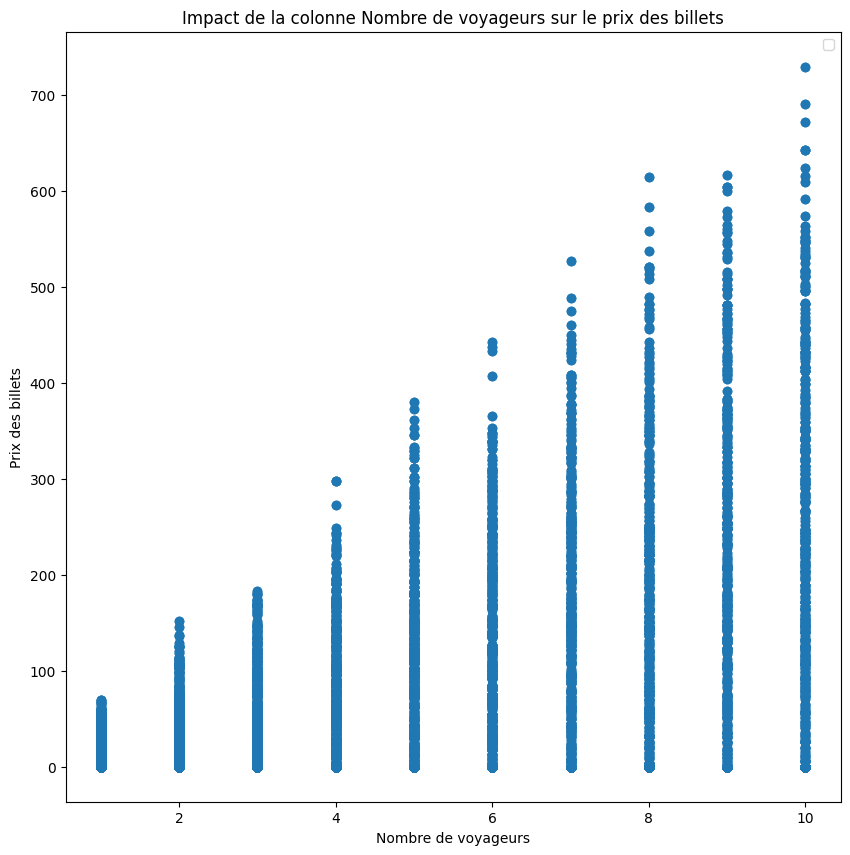

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


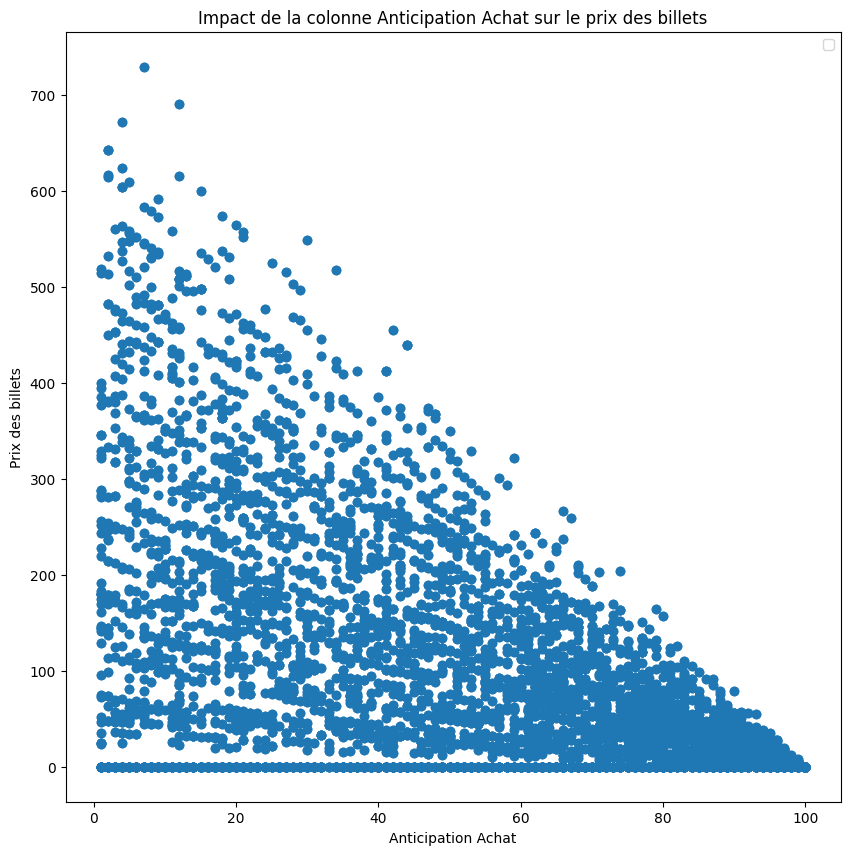

In [38]:
for col in ['Nombre de voyageurs', 'Anticipation Achat']: 
    plt.figure(figsize=(10,10))
    plt.scatter(df_trafic[col], df_trafic['Prix des billets'])
    plt.title(f'Impact de la colonne {col} sur le prix des billets')
    plt.xlabel(f'{col}')
    plt.ylabel('Prix des billets')
    plt.legend()
    plt.show()

Plus le nombre de voyageurs est grand plus le prix des billets sera grand. 

Moins l'acheteur anticipe son achat de billet est plus le billet de train est cher. 

In [50]:
df_trafic_heure = df_trafic
df_trafic_heure['heure_D'] = (pd.to_datetime(df_trafic_heure['Heure départ'], format='%H%M').dt.time).apply(lambda x: x.strftime('%H:%M'))
df_trafic_heure['heure_A'] = (pd.to_datetime(df_trafic_heure['Heure arrivée'], format='%H%M').dt.time).apply(lambda x: x.strftime('%H:%M'))
df_trafic_heure.head()

,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF,ville_origine,ville_destination,distance,heure_D,heure_A
0,0,4144,10009,10004,1708,1908,8,11,410.112,False,Paris,Lyon,576,17:08,19:08
1,1,4144,10009,10004,1708,1908,8,11,410.112,False,Paris,Lyon,576,17:08,19:08
2,2,4144,10009,10004,1708,1908,7,1,399.168,False,Paris,Lyon,576,17:08,19:08
3,3,4144,10009,10004,1708,1908,7,1,399.168,False,Paris,Lyon,576,17:08,19:08
4,4,4144,10009,10004,1708,1908,6,65,120.960,False,Paris,Lyon,576,17:08,19:08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


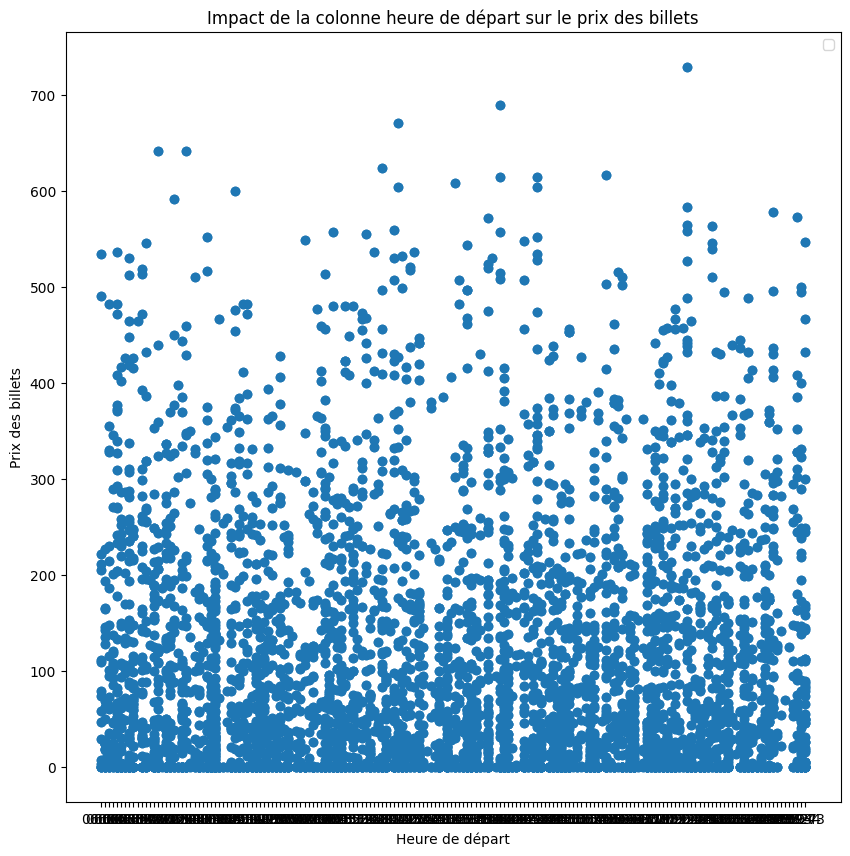

In [56]:
df_trafic_heure_depart_ascend = df_trafic_heure.sort_values(by = 'heure_D')
plt.figure(figsize=(10,10))
plt.scatter(df_trafic_heure_depart_ascend['heure_D'], df_trafic_heure_depart_ascend['Prix des billets'])
plt.title(f'Impact de la colonne heure de départ sur le prix des billets')
plt.xlabel('Heure de départ')
plt.ylabel('Prix des billets')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


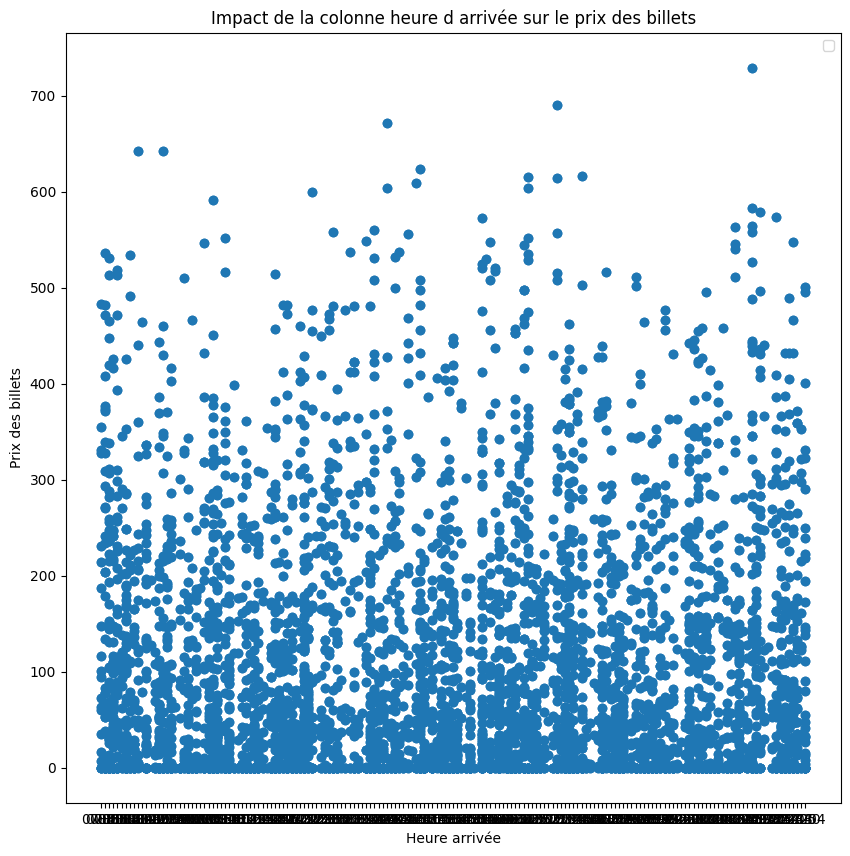

In [57]:
df_trafic_heure_arrivee_ascend = df_trafic_heure.sort_values(by = 'heure_A')
plt.figure(figsize=(10,10))
plt.scatter(df_trafic_heure_arrivee_ascend['heure_A'], df_trafic_heure_arrivee_ascend['Prix des billets'])
plt.title(f'Impact de la colonne heure d arrivée sur le prix des billets')
plt.xlabel('Heure arrivée')
plt.ylabel('Prix des billets')
plt.legend()
plt.show()

Difficile de dire quelque chose de ces deux colonnes, je n'ai pas le temps d'approfondir le sujet.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


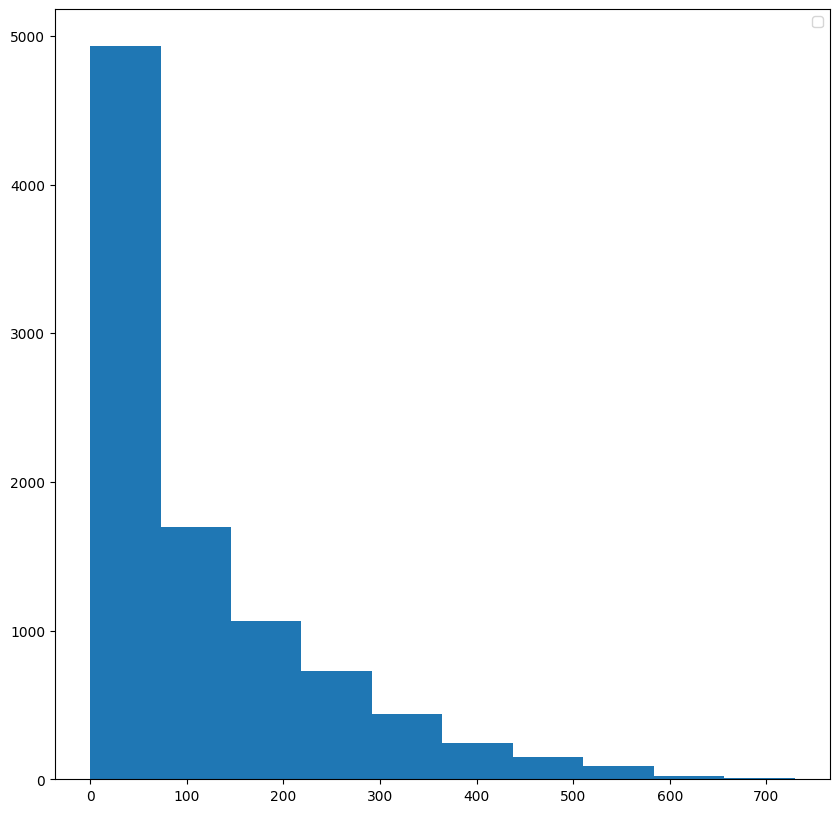

In [55]:
# Distribution du prix des billets 
plt.figure(figsize=(10,10))
plt.hist(df_trafic_heure_arrivee_ascend['Prix des billets'])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


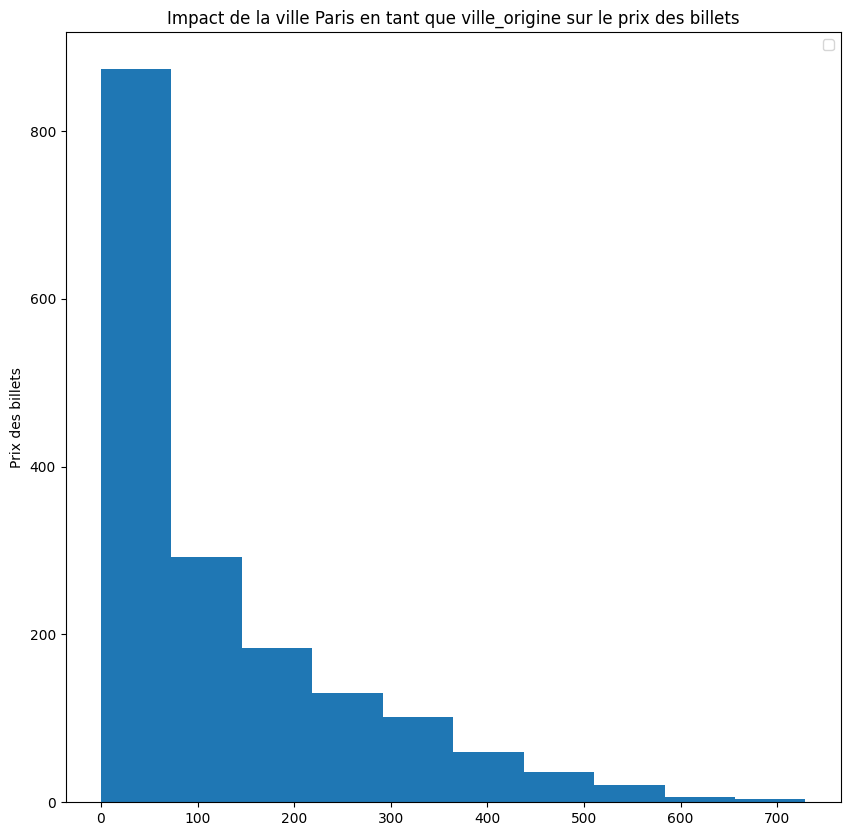

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


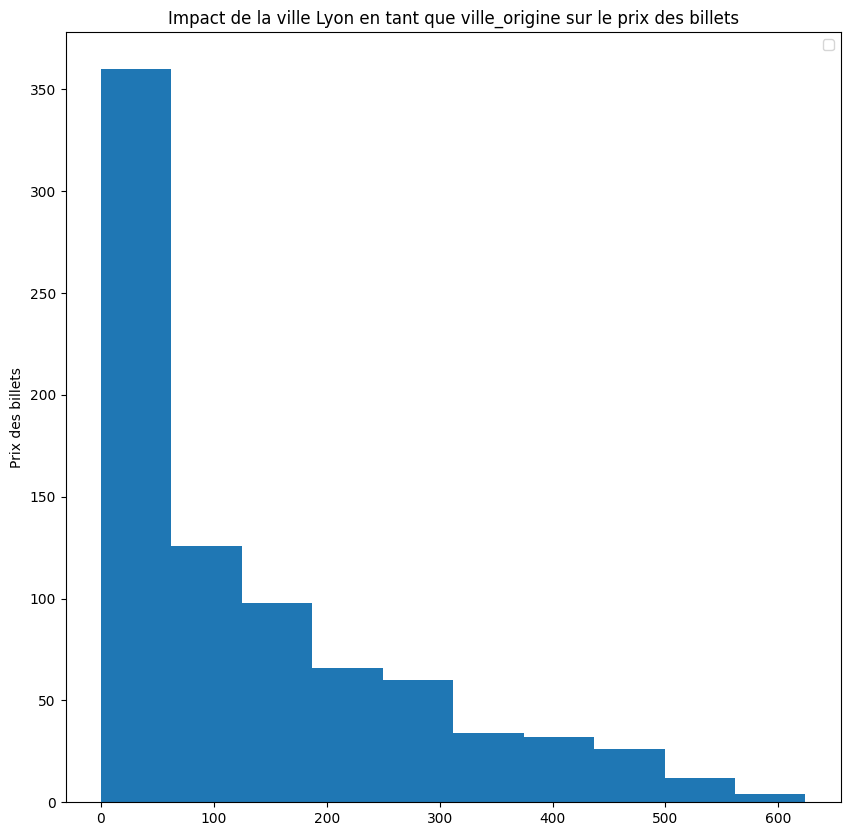

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


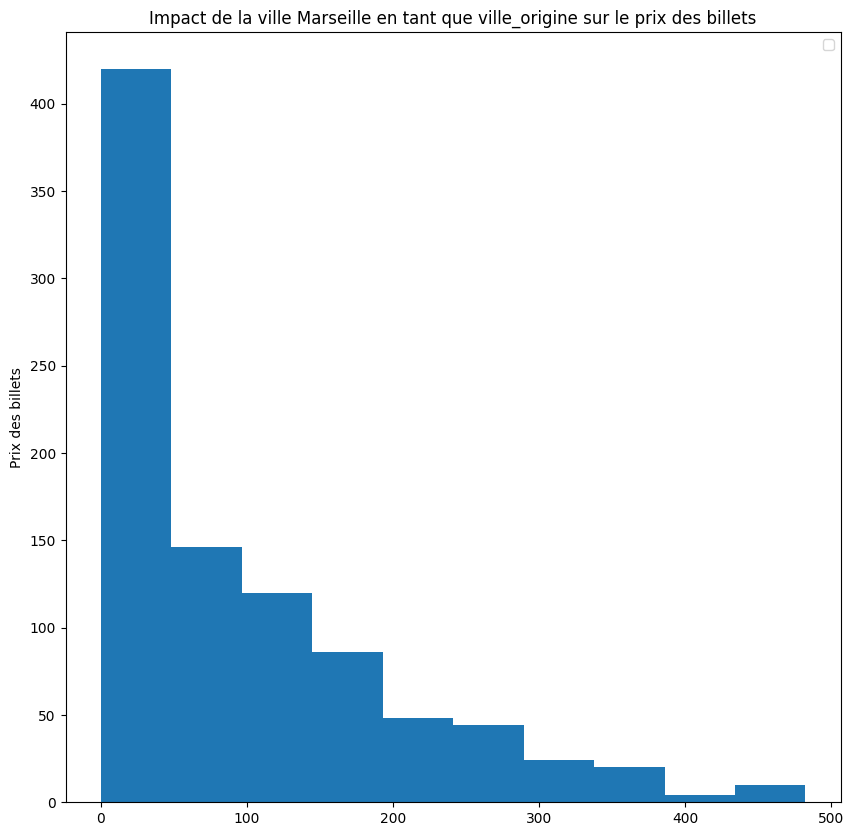

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


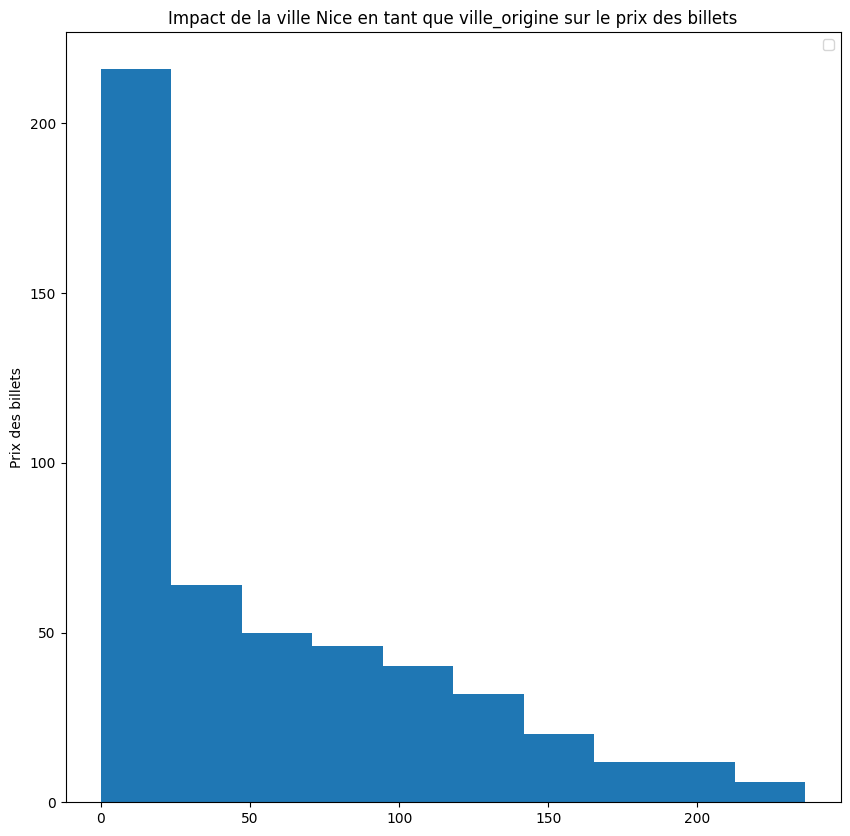

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


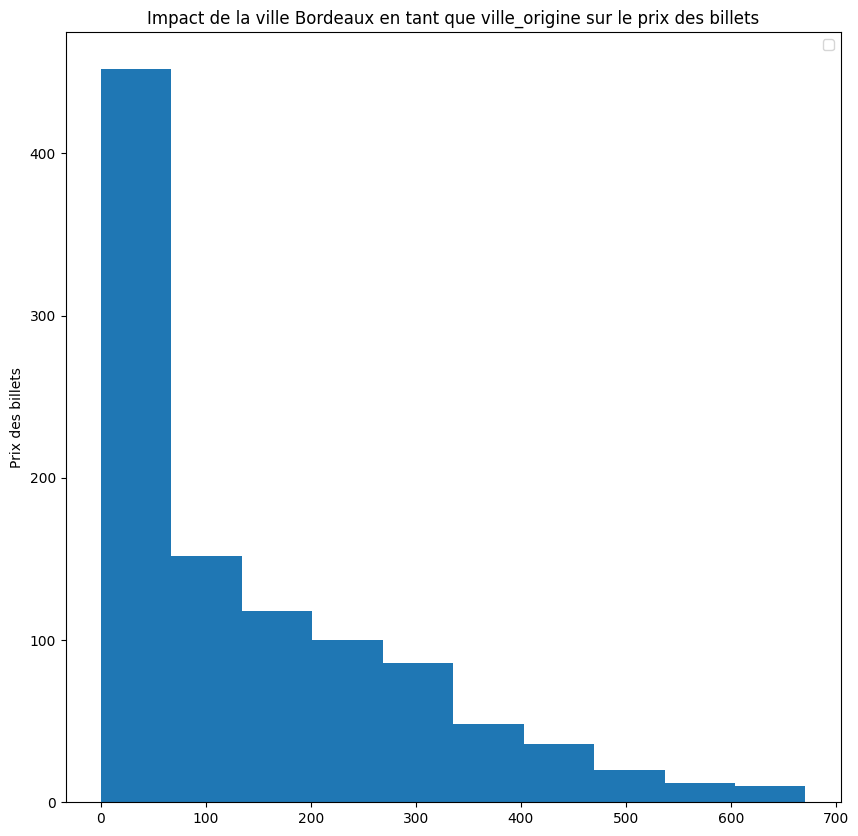

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


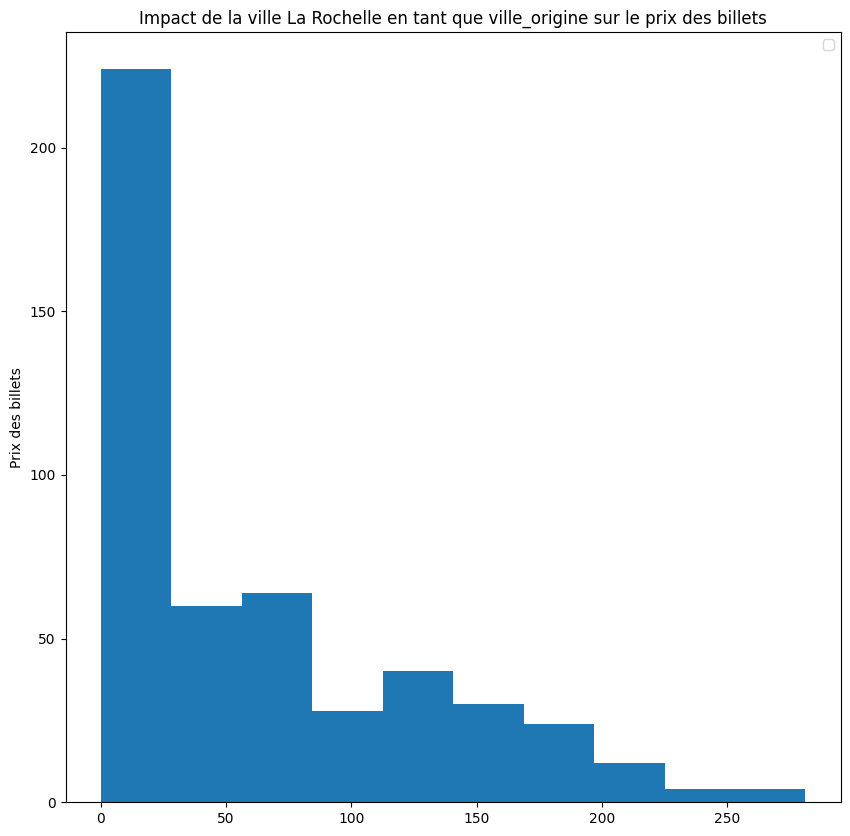

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


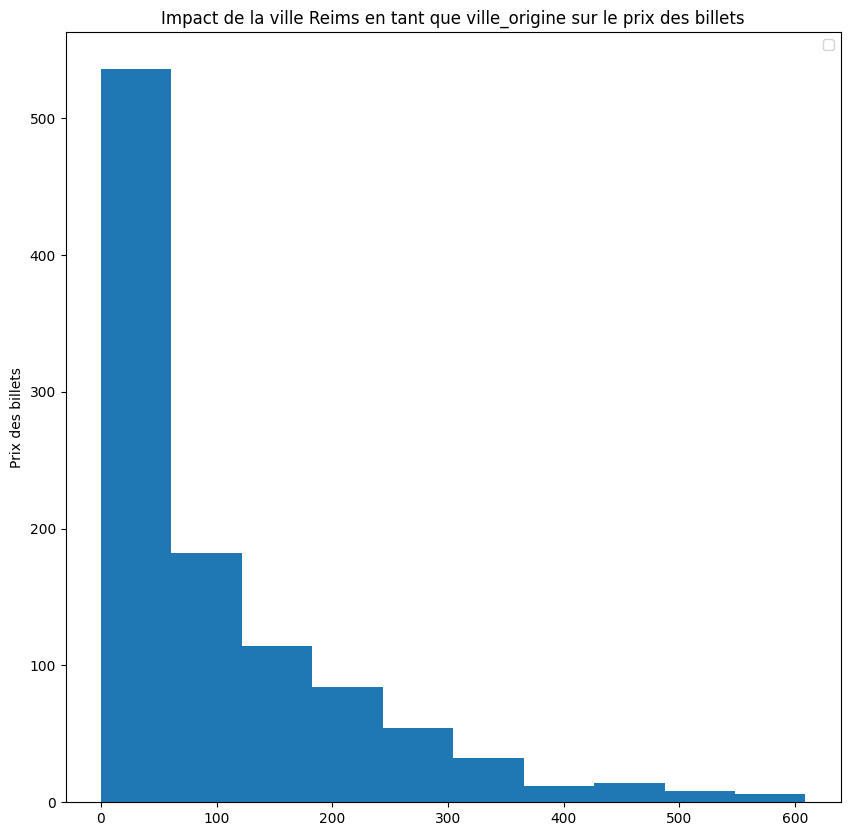

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


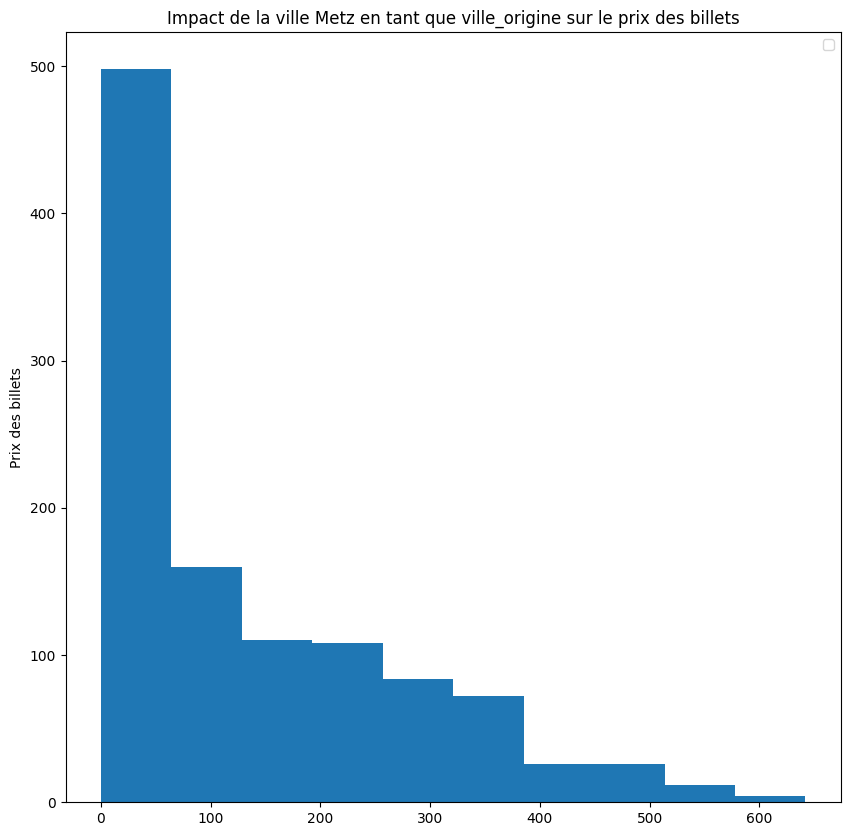

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


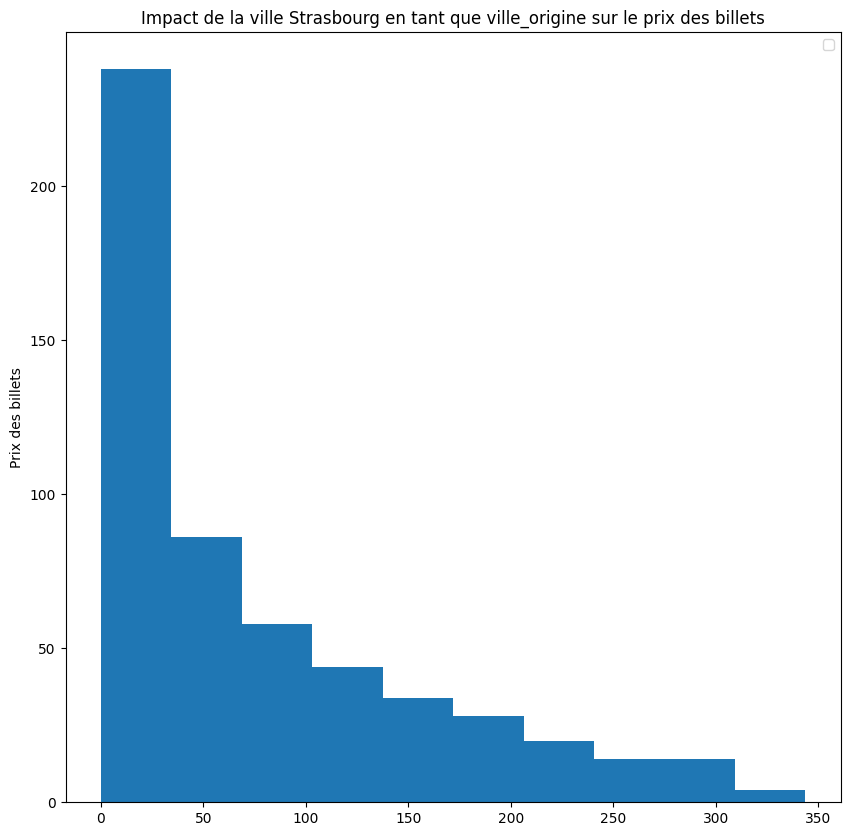

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


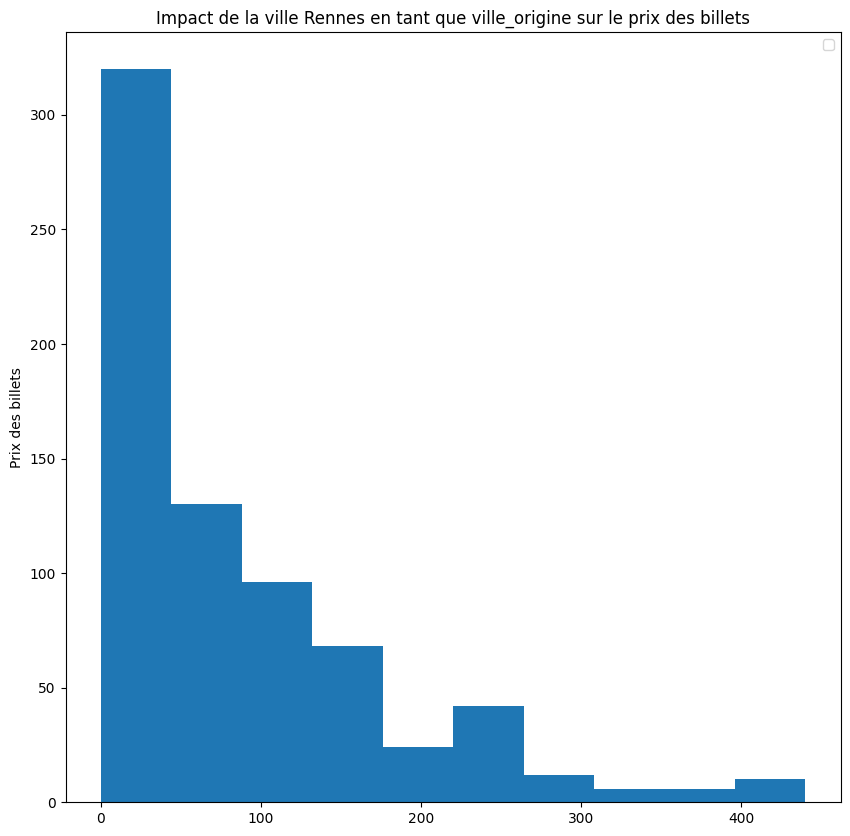

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


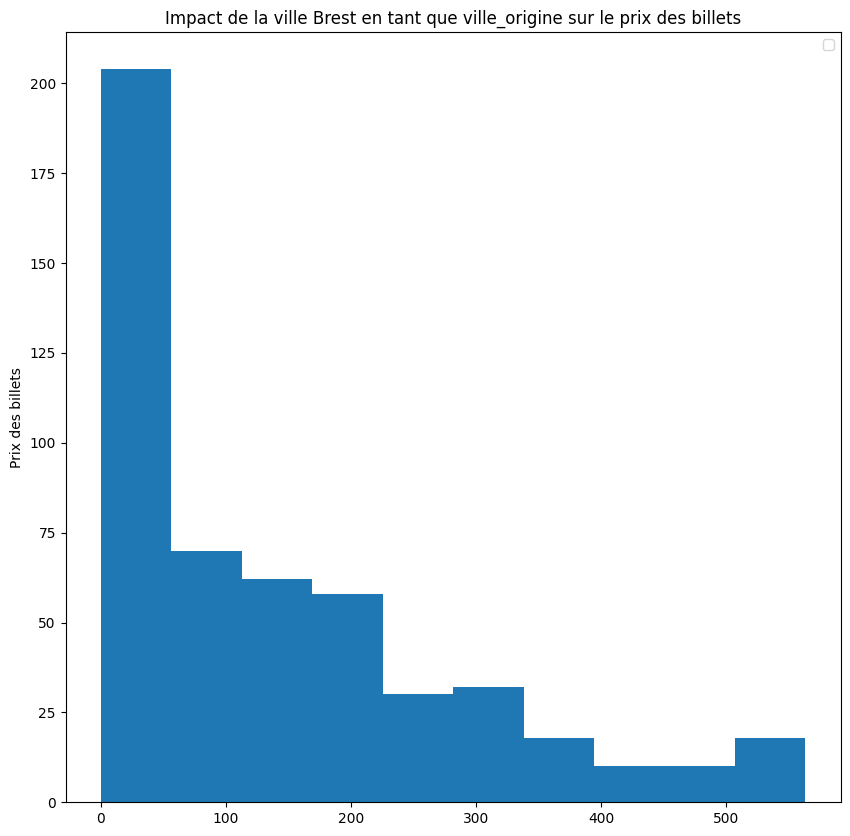

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


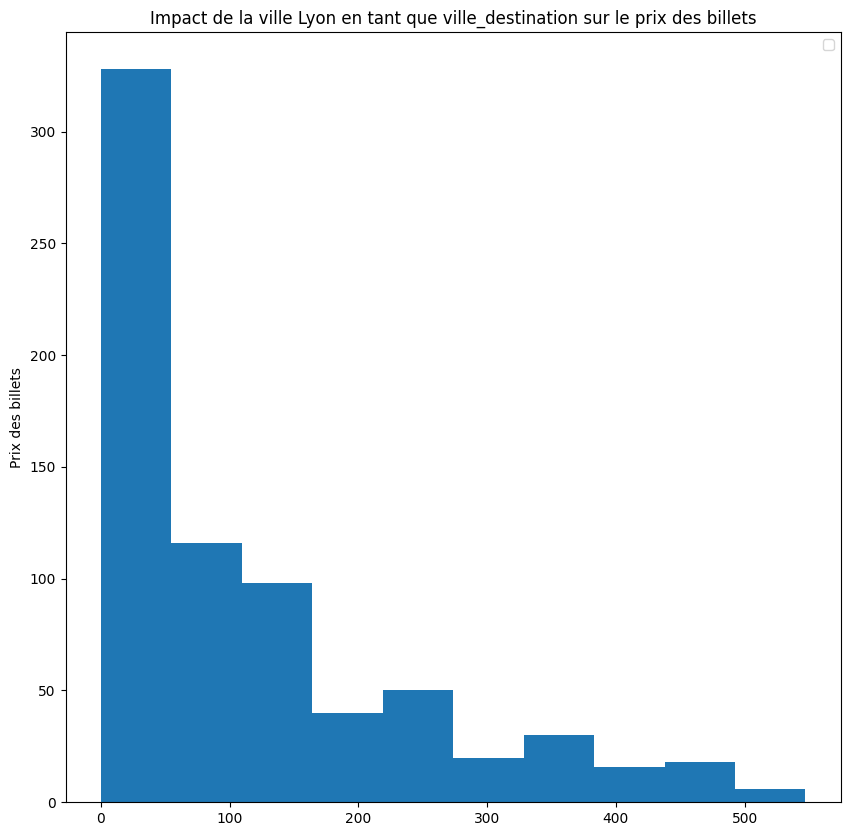

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


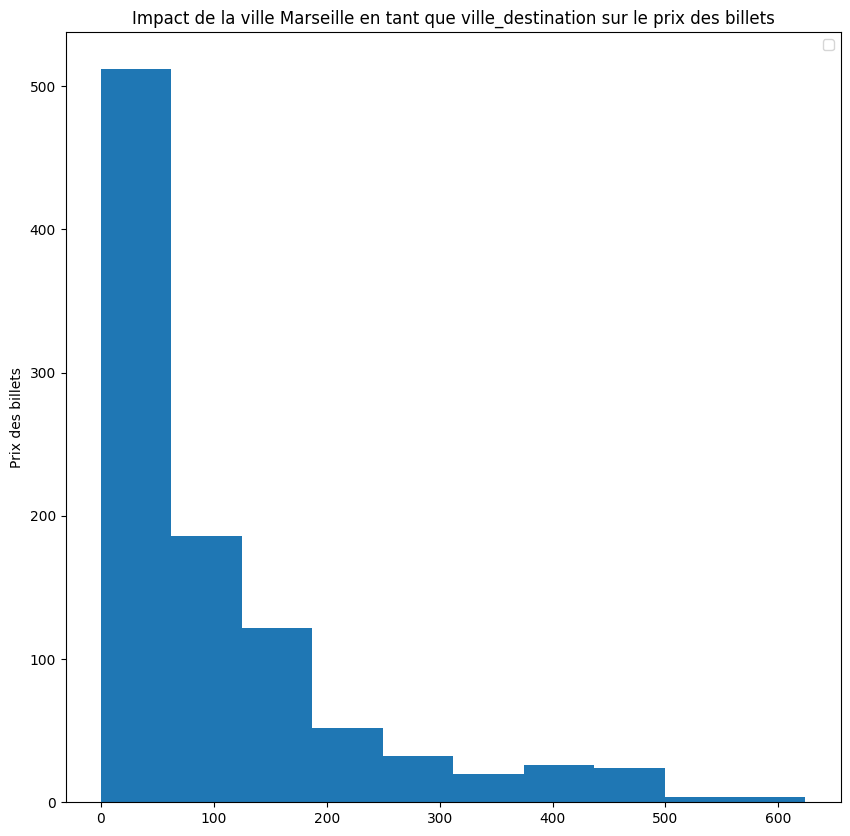

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


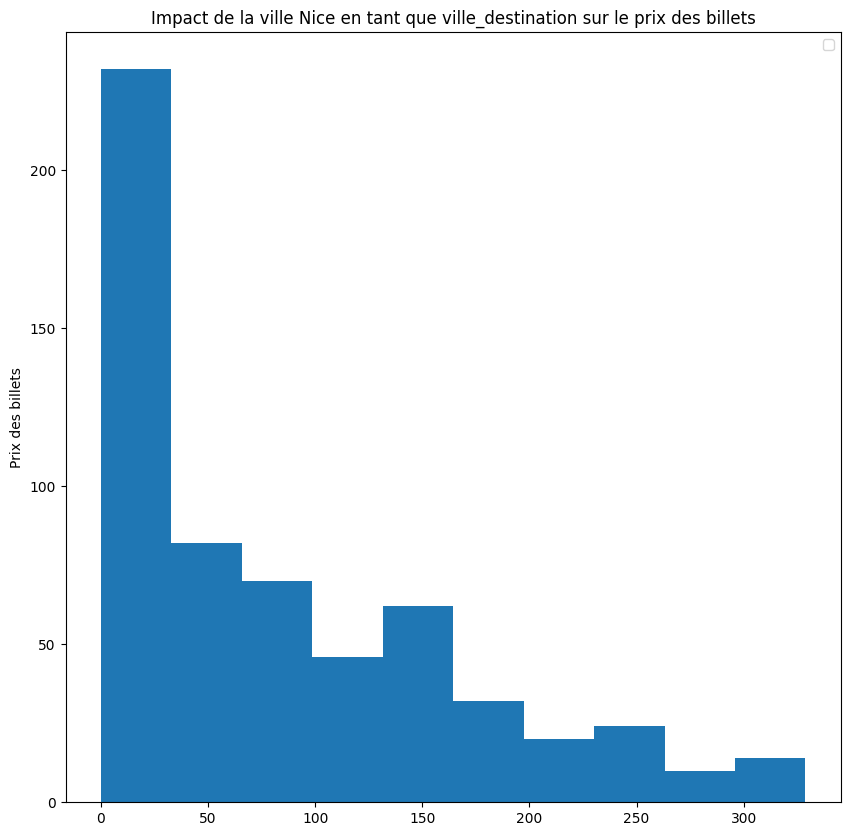

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


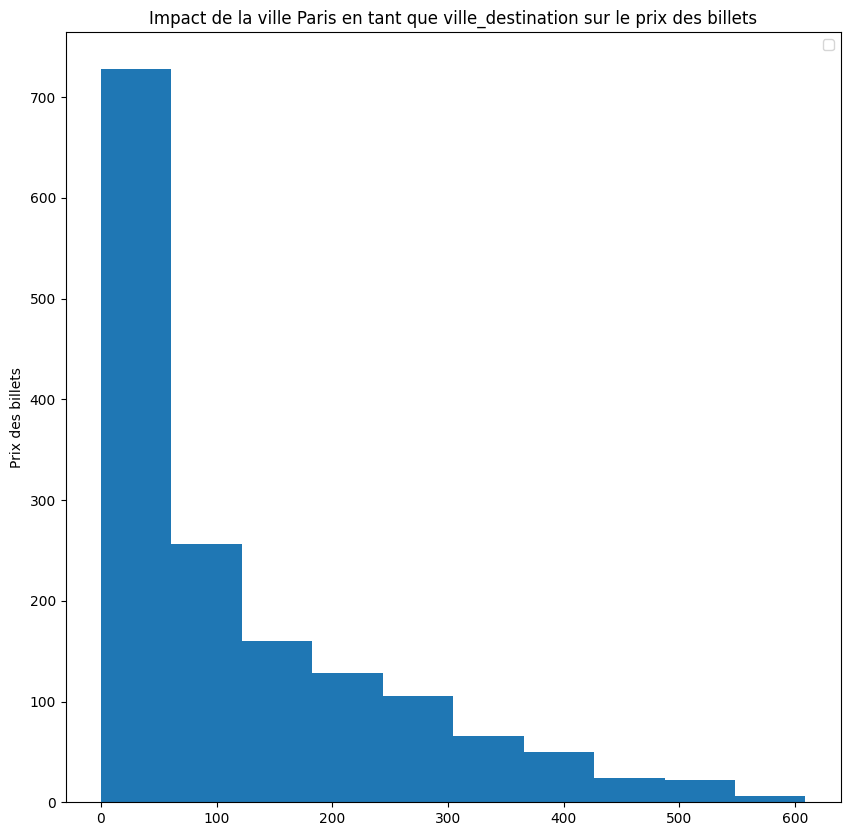

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


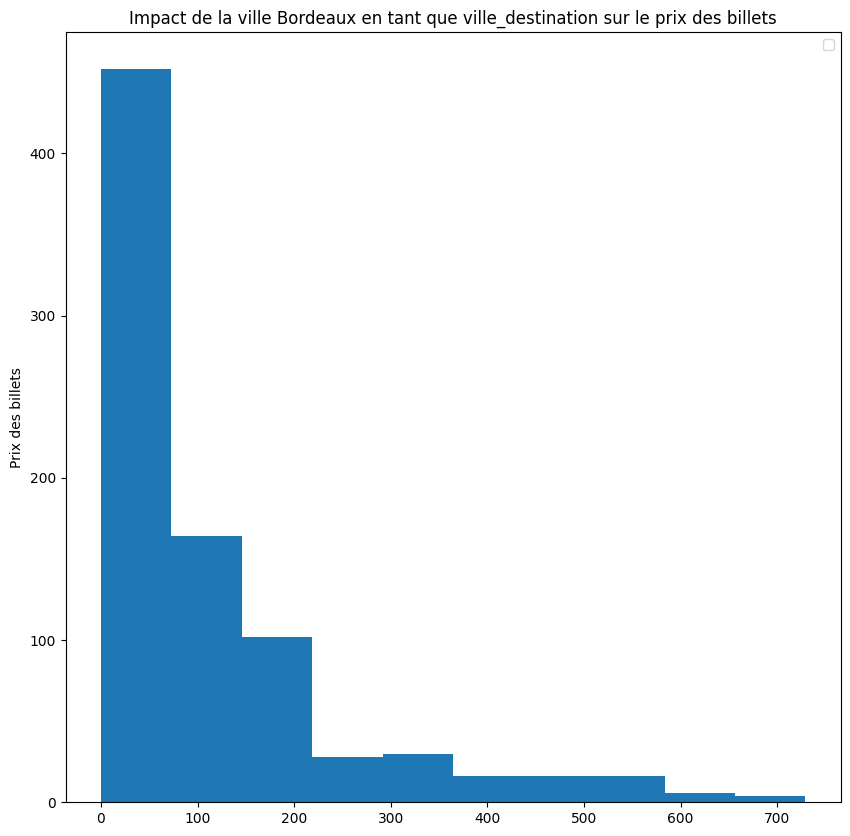

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


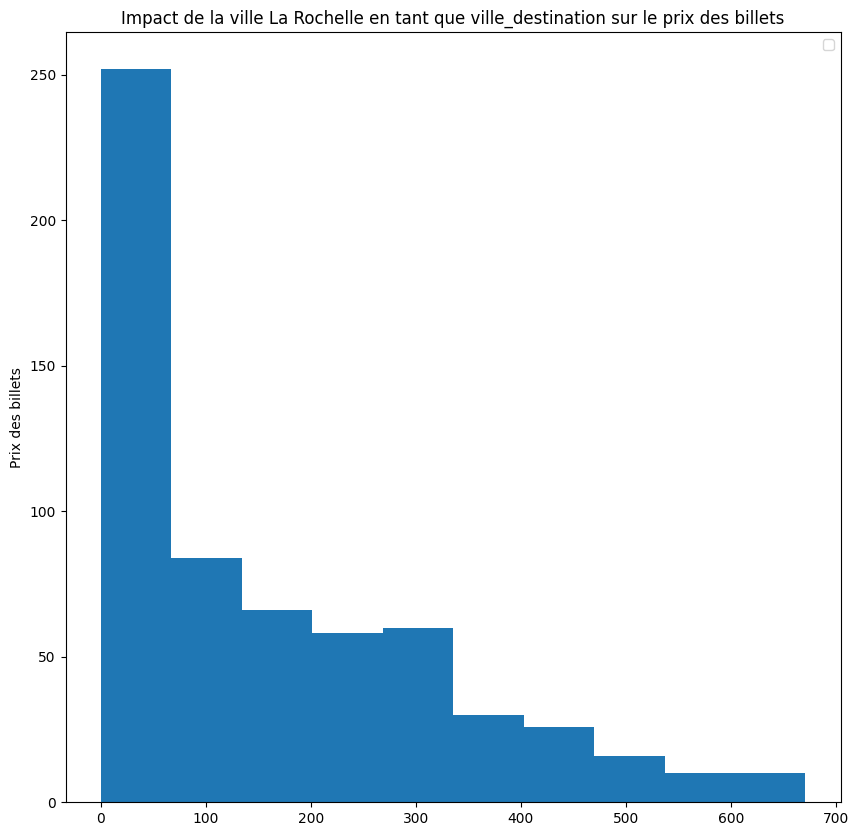

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


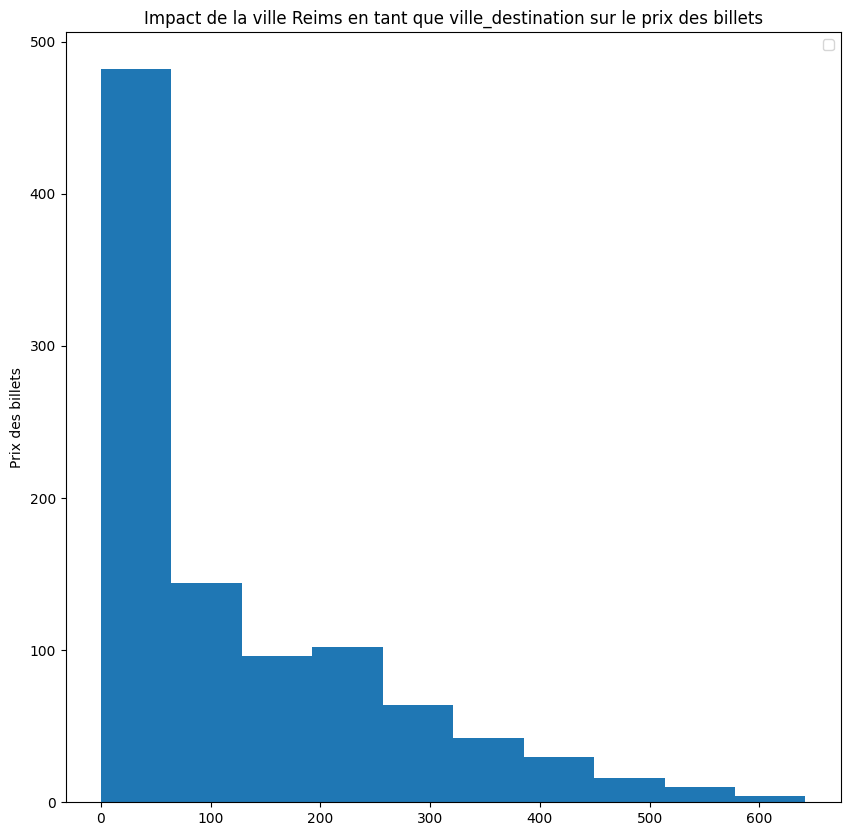

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


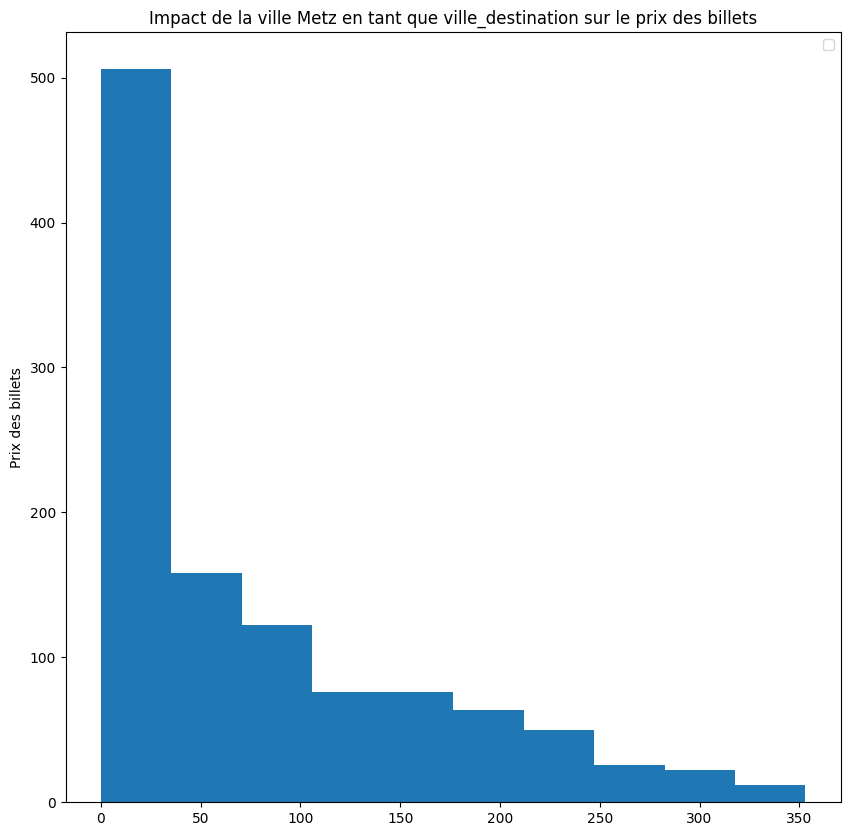

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


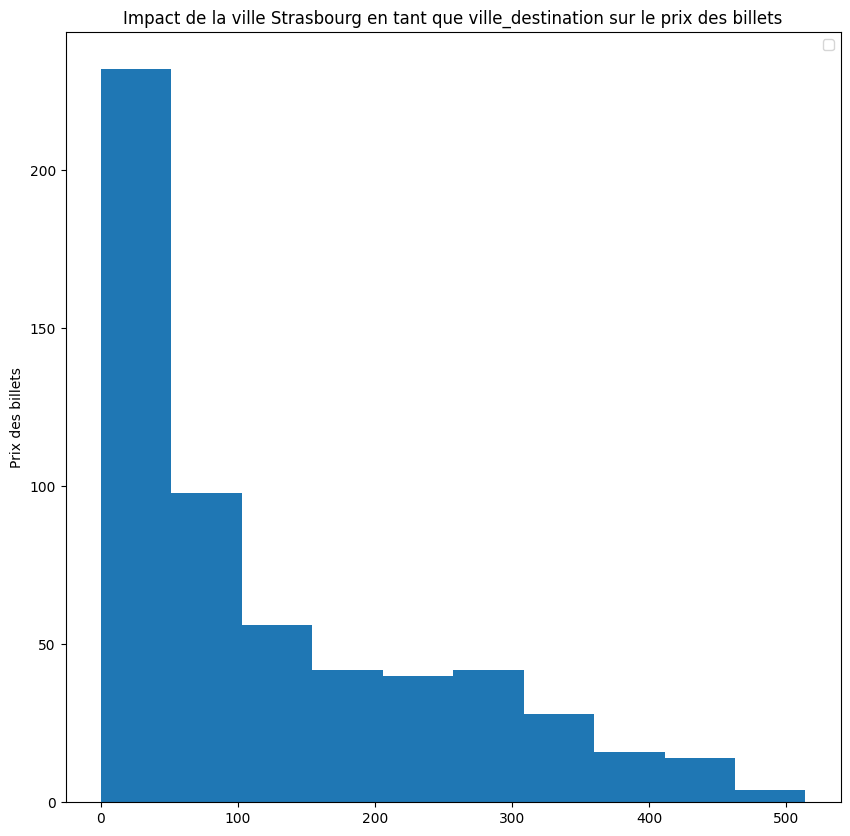

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


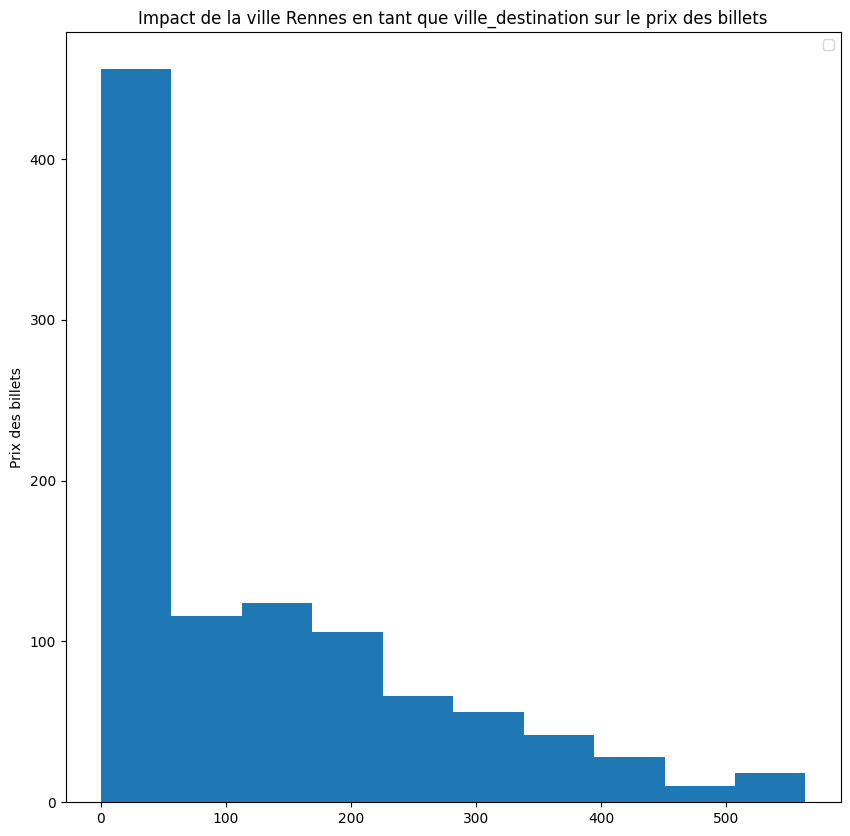

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


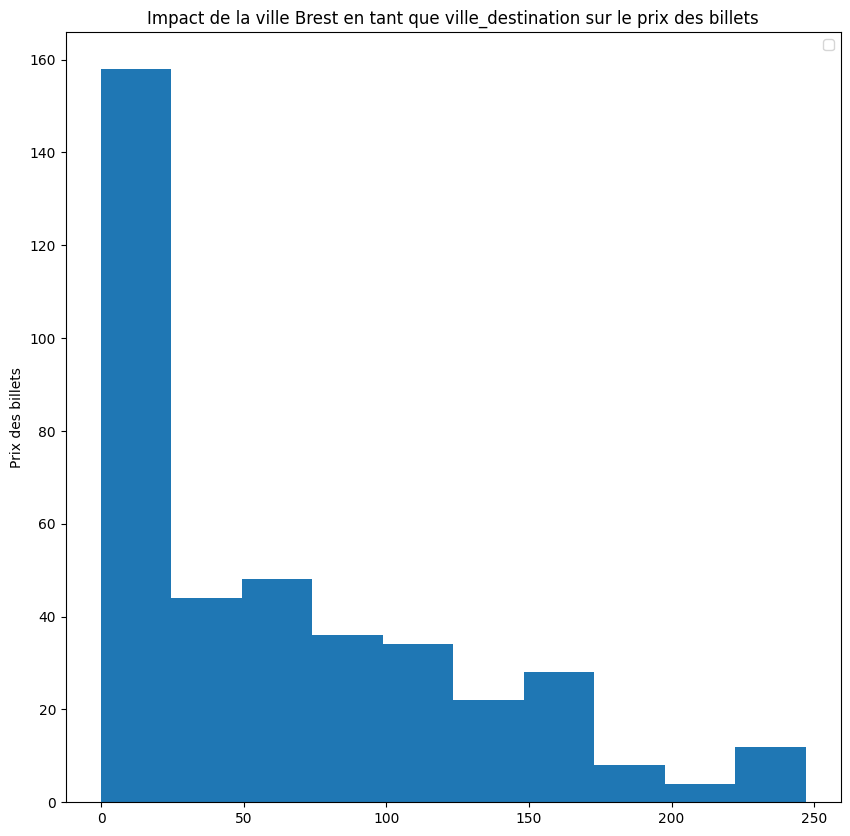

In [64]:
for col in ['ville_origine', "ville_destination"]: 
    for ville in df_trafic[col].unique():
        plt.figure(figsize=(10,10))
        sub_df = df_trafic[df_trafic[col] == ville]
        plt.hist(sub_df['Prix des billets'])
        plt.title(f'Impact de la ville {ville} en tant que {col} sur le prix des billets')
        plt.ylabel('Prix des billets')
        plt.legend()
        plt.show()

Il me faudrait plus de temps pour faire une étude approfondie mais il est clair que Paris sort du lot : lorsque paris est la ville de départ ou d'arrivée, le prix du billet de train est souvent plus cher. 

## 3. Pour le train 4144, donner le nombre de personnes présentes dans le train, dans le segment entre Lyon et Marseille

In [68]:
type(df_trafic['Train'][2])

numpy.int64

In [69]:
df_trafic

,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF,ville_origine,ville_destination,distance,heure_D,heure_A
0,0,4144,10009,10004,1708,1908,8,11,410.112,False,Paris,Lyon,576,17:08,19:08
1,1,4144,10009,10004,1708,1908,8,11,410.112,False,Paris,Lyon,576,17:08,19:08
2,2,4144,10009,10004,1708,1908,7,1,399.168,False,Paris,Lyon,576,17:08,19:08
3,3,4144,10009,10004,1708,1908,7,1,399.168,False,Paris,Lyon,576,17:08,19:08
4,4,4144,10009,10004,1708,1908,6,65,120.960,False,Paris,Lyon,576,17:08,19:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,9373,4810,10007,10009,1657,1957,6,85,42.120,False,Rennes,Paris,468,16:57,19:57
9374,9374,4810,10007,10009,1657,1957,4,93,13.104,False,Rennes,Paris,468,16:57,19:57
9375,9375,4810,10007,10009,1657,1957,4,93,13.104,False,Rennes,Paris,468,16:57,19:57
9376,9376,4810,10007,10009,1657,1957,9,100,0.000,False,Rennes,Paris,468,16:57,19:57


In [74]:
df_4144 = df_trafic[df_trafic['Train'] == 4144]
subdf_4144 = df_4144[((df_4144['ville_destination']=='Lyon') & (df_4144['ville_origine']=='Marseille')) |
                    ((df_4144['ville_destination']=='Marseille') & (df_4144['ville_origine']=='Lyon'))]
print('Le nombre de personnes présentes dans le train, dans le segment entre Lyon et Marseille est : ',  subdf_4144["Nombre de voyageurs"].sum())

Le nombre de personnes présentes dans le train, dans le segment entre Lyon et Marseille est :  66


## 4. On aimerait savoir quelle est l'heure préférée des voyageurs voulant effectuer un Paris – Lyon. Proposer et développer une démarche simple pour obtenir une courbe avec :

- En abscisse, les heures de la journée

- En ordonnée, la densité des voyageurs souhaitant arriver à la ville de Lyon à cette heure-ci.

In [89]:
df_trafic = pd.read_csv('dataframe_q1.csv')
df_trafic['Heure arrivée'] = df_trafic['Heure arrivée'].astype(str)
df_trafic['Heure arrivée'] = df_trafic['Heure arrivée'].str[:2]
df_trafic['Heure départ'] = df_trafic['Heure départ'].astype(str)
df_trafic['Heure départ'] = df_trafic['Heure départ'].str[:3]

In [90]:
df_paris_lyon = df_trafic[(df_trafic['ville_destination']=='Lyon') & (df_trafic['ville_origine']=='Paris')]
df_paris_lyon.sort_values(inplace = True, by = 'Heure départ')
df_paris_lyon

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2262/2167595795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paris_lyon.sort_values(inplace = True, by = 'Heure départ')


,Unnamed: 0.1,Unnamed: 0,Train,Origine,Destination,Heure départ,Heure arrivée,Nombre de voyageurs,Anticipation Achat,Prix des billets,Agent SNCF,ville_origine,ville_destination,distance
159,159,159,6074,10009,10004,131,15,3,36,110.592,False,Paris,Lyon,576
156,156,156,6074,10009,10004,131,15,8,88,55.296,False,Paris,Lyon,576
157,157,157,6074,10009,10004,131,15,8,88,55.296,False,Paris,Lyon,576
158,158,158,6074,10009,10004,131,15,3,36,110.592,False,Paris,Lyon,576
160,160,160,6074,10009,10004,131,15,2,94,6.912,False,Paris,Lyon,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,386,6363,10009,10004,819,10,3,16,145.152,False,Paris,Lyon,576
387,387,387,6363,10009,10004,819,10,3,16,145.152,False,Paris,Lyon,576
388,388,388,6363,10009,10004,819,10,8,53,216.576,False,Paris,Lyon,576
389,389,389,6363,10009,10004,819,10,8,53,216.576,False,Paris,Lyon,576


Je viens de réaliser que les données pour les heures sont aussi simulées ... 

Peu importe, on peut regrouper les individus en prenant les trois premiers numéros afin de faire des classes.

In [91]:
sub_df = df_paris_lyon[['Heure départ', 'Nombre de voyageurs']]
sub_df = sub_df.groupby('Heure départ')['Nombre de voyageurs'].sum().reset_index()
sub_df.head()

,Heure départ,Nombre de voyageurs
0,131,46
1,135,20
2,170,264
3,172,326
4,181,468


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


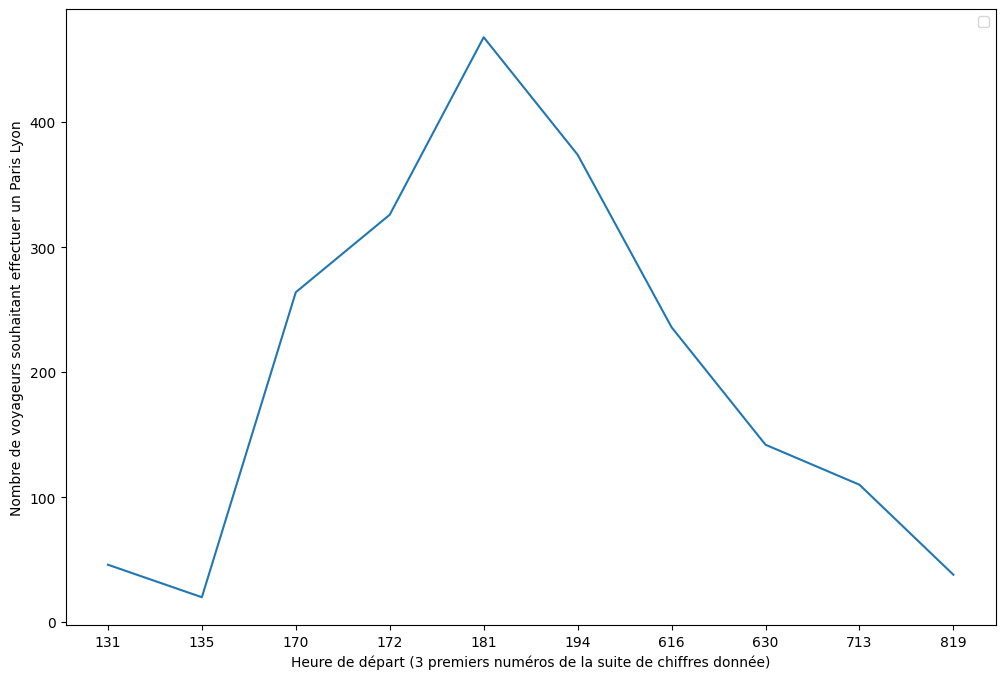

In [93]:
plt.figure(figsize = (12,8))
plt.plot(sub_df['Heure départ'], sub_df['Nombre de voyageurs'])
plt.xlabel('Heure de départ (3 premiers numéros de la suite de chiffres donnée)')
plt.ylabel('Nombre de voyageurs souhaitant effectuer un Paris Lyon')
plt.legend()
plt.show()

# Partie Maths/Stats :

## 4. On veut augmenter le prix du billet de 5% sur le Paris-Lyon. Sans coder, expliquer comment vous mesureriez l'effet sur le trafic entre Paris et Lyon (expliciter précisément la méthode statistique employée et la démarche économique).

Réponse : 

J'effectue une régression linéaire du log du prix du billet entre Paris et Lyon sur le trafic entre les deux villes en incluant des variabes explicatives pouvant aussi influencer le trafic (période de vacances scolaires / jours fériés / évènements ...). 

Je vérifie que le coefficient associé au log du prix du billet est significatif. 

On note $ \beta $ le coefficient associé au log du prix du billet dans la régression effectuée. 

Je peut alors répondre à la question : une augmentation de 5% du prix du billet sur le Paris-Lyon a pour effecter une agumentation de $ \frac{5 \beta }{100}$ du nombre de voyageurs. 

## 5. On vous donne une liste de 16 nombres dans un ordre aléatoire. Combien de comparaison avez-vous besoin de faire pour trouver le 2ème plus grand élément ?

Je connais l'algorithme de tri rapide qui a une complexité moyenne de O(nlog(n)) donc ici environ 64 comparaisons. 

- Choisir un élément pivot au milieu de la liste 

- Diviser la liste en trois parties : éléments égaux au pivot, plus petits que le pivot, plus grands que le pivot 

- Récursivement trier plus petits et plus grands selon la même méthode

- Concaténer : [plus petits triés] + [égaux] + [plus grands triés]

In [94]:
def tri_rapide(liste):
    if len(liste) <= 1:
        return liste
    else: 
        pivot = liste[len(liste) // 2]
        petits = [x for x in liste if x < pivot]
        égaux = [x for x in liste if x == pivot]
        grands = [x for x in liste if x > pivot]
        return tri_rapide(petits) + égaux + tri_rapide(grands)

In [95]:
import random
liste_aléatoire = [random.randint(1, 100) for _ in range(16)]
print("Liste aléatoire :", liste_aléatoire)
liste_trie = tri_rapide(liste_aléatoire)
print("Liste triée : ", liste_trie)

Liste aléatoire : [18, 77, 76, 36, 96, 11, 14, 86, 56, 100, 62, 79, 9, 97, 81, 40]
Liste triée :  [9, 11, 14, 18, 36, 40, 56, 62, 76, 77, 79, 81, 86, 96, 97, 100]


FIN ! 

Je n'ai pas eu le temps de vraiment me pencher sur la partie EDA, le temps m'a semblé relativement court. Je pense que si j'étais amené à faire un stage avec vous, je serais en mesure de prendre plus de temps pour réaliser des analyses plus détaillées et mieux structurées.